# Assignment 3
By Manjyot Singh Nanra-21111038 <br/>
manjyots21@iitk.ac.in

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from random import randint
import time
import matplotlib.pyplot as plt

## Question 1.a) Code up the perceptron algorithm
Coding Perceptron algorithm from one mentioned on slide. <br/>
Will write the algorithm here for reference

**Stochaistic SubGD**
1) Initilize w = w<sup>(0)</sup>, t=0, set $\eta_t=1, \forall t$ <br/>
2) Pick some $(x_n, y_n)$ randomly <br/>
3) If current w makes a mistake on $(x_n, y_n)$, i.e., $y_n w^{(t)^T}x_n < 0 $ :<br/>
$$ w^{(t+1)} = w^{t} + y_n x_n $$
$$ t = t + 1 $$
4) If not converged, go to step 2

- For this algorithm, we will usually initialize w0 as arrays of ones <br/>
- This algorithm converges either when there are more than a certain numbers of mistake free rounds, 
- This number of mistake_free_threshold will be hyper parameter, which means, if algorithm runs for certain number of rounds without making mistakes, we conclude that it converged
- Algorithm will also have a hard limit of max number of times algorithm will run(variable iterations)
- eta is the learning rate, it is the greek word from the slide
- Algorithm will return the weights it learns
- NOTE: I have tried to use almost same notations as slide

In [2]:
# Code Implementation
def stochaistic_subGD(X, Y, w0, mistake_free_threshold=60, eta=1):
    # Initializing w, and t
    iterations=10000
    w = w0.copy()
    t = 0
    eta = 1 # eta is the greek word from slide
    tol=0.1
    wt_plus_1 = w.copy() # Starting with wt = w
    mistake_free_rounds = 0
    # Run for this many iterations
    for i in range(iterations):
        
        wt = wt_plus_1.copy()
        # Randomly picking (xn, yn)
        
        n = randint(0, len(X)-1)
        xn, yn = X.iloc[n], Y.iloc[n]
        # ----------------------
        
        # Check if w is making mistake on (xn, yn)
        # If yes then update w
        
        if yn*np.dot(wt,xn) < 0:
            mistake_free_rounds = 0
            wt_plus_1 = np.array(wt + eta * yn*xn)
            
            if np.sum(np.abs(wt_plus_1 - wt)) <= tol:
                break
            t+= 1
        else:
            # This means there is no mistake
            mistake_free_rounds +=1
        # ----------------------
        
        # Check if converged or not
        # if converged then break
        if mistake_free_rounds == mistake_free_threshold:
            
            break
    #print(f"Converged at {i}")
    return wt_plus_1

### Question 1.b) 
Write functions to make predictions using the algorithm for the banknotes dataset

Thus making two functions, one to make prediction given the weights, <br/>other to use the algorithm, get the weights and call prediction function

In [3]:
def predict(w, X_test):
    # simply multiplying and returning,
    Y_pred = np.dot(X_test, w)
    Y_pred[Y_pred < 0] = -1
    Y_pred[Y_pred >= 0] = 1
    return Y_pred


def use_algorithm(X_train, Y_train, X_test,mistake_threshold=60, eta=1):
    # Using w0 as array of ones.
    # Size of w will be 4, because 
    w0 = np.ones(X.shape[1])
    
    # learn the weights from algorithm
    w = stochaistic_subGD(X_train, Y_train, w0, mistake_threshold, eta)
    
    # Get prediction for X_test
    Y_pred = predict(w, X_test)
    
    return Y_pred
    
    

Part 2 of question 1.b)Preprocess the dataset to handle missing and anomalous data.

In [4]:
# Loading the dataset in dataframe
data_filename = "data_banknote_authentication.txt"
df = pd.read_csv(data_filename, names=["variance","skewness","curtosis","entropy","class"])

In [5]:
# Check if data is loaded properly and show first five entries
df.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


We will now check whether there are duplicate entries in our dataset

In [6]:
duplicate = df.groupby(['variance', 'skewness', 'curtosis',"entropy", "class"]).size().reset_index(name='count')
duplicate[duplicate["count"]>1]

,variance,skewness,curtosis,entropy,class,count
194,-2.6479,10.1374,-1.3310,-5.4707,0,3
318,-1.8584,7.8860,-1.6643,-1.8384,0,3
421,-1.3000,10.2678,-2.9530,-5.8638,0,3
486,-0.7869,9.5663,-3.7867,-7.5034,0,2
561,-0.2780,8.1881,-3.1338,-2.5276,0,2
572,-0.2062,9.2207,-3.7044,-6.8103,0,3
649,0.3292,-4.4552,4.5718,-0.9888,0,4
656,0.3798,0.7098,0.7572,-0.4444,0,4
675,0.5195,-3.2633,3.0895,-0.9849,0,4
686,0.5706,-0.0248,1.2421,-0.5621,0,4


Above are the entries that are duplicate, we will drop duplicat entries.

In [7]:
df = df.drop_duplicates()

In [8]:
# Now Get general idea of how the data is distributed
df.describe()

,variance,skewness,curtosis,entropy,class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
# Since class variable values are either 0 or 1, we need them to be -1 or 1 
# for algorithm to work
# Hence we replace 0s with -1s
df["class"].replace(0, -1, inplace=True)

In [10]:
# Also from the above describe() function, we can notice that data is not well spread, 
# initial 50% of data contains entries of class = 0 then rest are 0
df = df.sample(frac=1)

Now we will get general idea for outliers in our data. <br/>
We will use boxplots to visualize outliers, then handle those

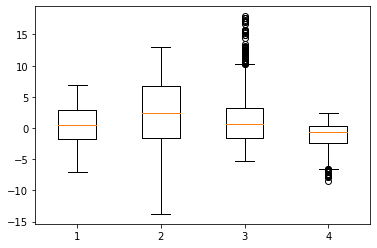

In [11]:
plt.boxplot([df.variance, df.skewness, df.curtosis, df.entropy])
plt.show()

Here we can see that curtosis has outliers above the "Upper Whiskers" and entropy has outliers below "Lower Whiskers" <br/>
We will update those values to the whisker values, we could also drop them, but since we have limited training data, we will replace them

In [12]:
# Technique to handle outliers

# Updating entropy
Q1 = df.entropy.quantile(0.25)
Q3 = df.entropy.quantile(0.75)
IQR=Q3-Q1

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
df.loc[df["entropy"]<Lower_Whisker,"entropy"] = Lower_Whisker

# Updating Curtosis
Q1 = df.curtosis.quantile(0.25)
Q3 = df.curtosis.quantile(0.75)
IQR=Q3-Q1

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
df.loc[df["curtosis"]>Upper_Whisker,"curtosis"] = Upper_Whisker


Visualizing the box plot again

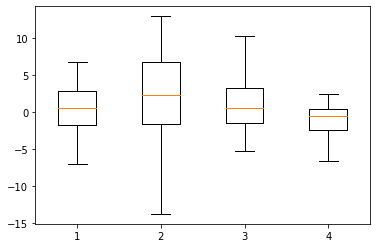

In [13]:
plt.boxplot([df.variance, df.skewness, df.curtosis, df.entropy])
plt.show()

In [14]:
# Checking for Null Values
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

There are no null values

In [15]:
# Getting X, and Y where Y is "class"
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [16]:

# now we will normalize the X dataframe
mean_x = X.mean()
std_x = X.std()
X = (X - mean_x)/std_x

This concludes with the preprocessing and handling missing, anomalous data


Now we will keep a held out data seperate for calculating final f1-score. <br/>
There is problem with terminology<br/>Question says "held out validation set" but the heldout set is actually called test set. <br/>
But for sake of this question, we will call if validation set.


In [17]:
# Function to get validation set. 
# uses simple numpy technique
def extract_validation_set(X, Y, split_ratio=0.80):
    
    msk = np.random.rand(len(X)) < split_ratio
    X_train = X[msk]
    X_test = X[~msk]
    Y_train = Y[msk]
    Y_test = Y[~msk]
    return X_train, X_test, Y_train, Y_test

In [18]:
# Seperating out validation set to treat it as heldout data to be 
# used in question 1.d
X, X_val, Y, Y_val = extract_validation_set(X, Y)

### Question 1.c) Train the algorithm on the dataset using cross-validation and report cross validated test set accuracy

- Writing code for cross validation
- We will need to code up confusion matrix too to get accuracy, errors and f1-score
- Cross validation code we acccept the learning rate, and mistake threshold, and run the algorithm through k-folds, then returns average test set accuracy and error across the k-folds

In [19]:
def get_confusion_matrix(Y_pred, Y_test):
    tp, tn, fp, fn = 0, 0, 0, 0
    for ind in range(len(Y_pred)):
        y_i_pred = Y_pred[ind]
        y_act = Y_test.iloc[ind]
        # True positive case
        if y_i_pred == 1 and y_act == 1:
            tp += 1
        # False positive case 
        elif y_i_pred == 1 and y_act == -1:
            fp += 1
            
        # False Negative case
        elif y_i_pred == -1 and y_act == 1:
            fn += 1
        # True negative case
        elif y_i_pred == -1 and y_act == -1:
            tn += 1
            
    acc = (tp+tn)/(len(Y_pred))
    error = 1-acc
    

    return tp, tn, fp, fn, acc, error

In [20]:
def k_fold_data_split(X, Y, mask):
    # This is the function that will be responsible to get train test splitting 
    # for k-fold
    X_train = X[~mask]
    Y_train = Y[~mask]
    X_test = X[mask]
    Y_test = Y[mask]
    
    return X_train, X_test, Y_train, Y_test

def cross_validation(X, Y, mistake_threshold=60, eta=1, folds=5):
    
    total_acc = 0 
    total_err = 0
    # Run folds number of times
    for i in range(folds):
        
        # This block of code will be used to generate a mask which 
        # will help us get train and test dataset
        mask = np.zeros((len(X)), dtype=bool)
        num_of_tests = int(len(X)/folds)
        if i == folds-1:
            mask[i*num_of_tests:] = True
        
        else:
            mask[i*num_of_tests: ((i+1)*num_of_tests)] = True

        X_train, X_test, Y_train, Y_test = k_fold_data_split(X, Y, mask)
        
        # Train data on train set, and get prediction for test set
        Y_pred = use_algorithm(X_train, Y_train, X_test,mistake_threshold, eta)
        
        # Get the confusion matrix using prediction
        tp, tn, fp, fn, acc, error = get_confusion_matrix(Y_pred, Y_test)
        # update accuracy and error
        total_acc += acc
        total_err += error
    
    # return average error and accuracy
    return total_acc/folds, total_err/folds
    


- We will try to find good value for mistake threshold
- Using Crossvalidation to report test set errors, so we can choose best values
- We will run the code for various values of mistake threshold
- We will see its relation with time and error percent

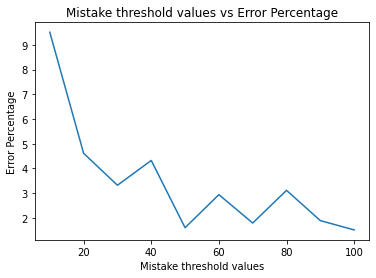

In [21]:
test_mistake_thresholds = [10,20,30,40,50,60,70,80,90,100]
#eta_values = [0.01, 0.05,0.1,0.5,1,2,3,4,5]
lookup = []
for mistake_val in test_mistake_thresholds:
    start_time = time.time()
    accuracy, error = cross_validation(X,Y,mistake_val)
    end_time = time.time()
    lookup.append([mistake_val, error,end_time-start_time])

lookup = np.array(lookup)
plt.plot(lookup[:,0], lookup[:,1]*100)
plt.xlabel("Mistake threshold values")
plt.ylabel("Error Percentage")
plt.title("Mistake threshold values vs Error Percentage")
plt.show()

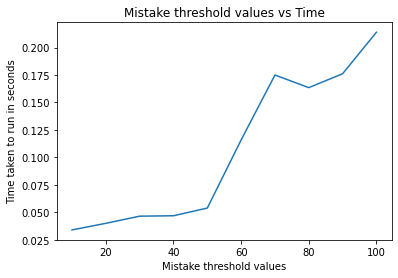

In [22]:
plt.plot(lookup[:,0],lookup[:,2])
plt.xlabel("Mistake threshold values")
plt.ylabel("Time taken to run in seconds")
plt.title("Mistake threshold values vs Time")
plt.show()

- As we can see after value mistake threshold of 30, we are getting low enough error percent. 
- But we also note that time is increasing exponentially with increase in mistakes allowed.
- So by keeping on increasing our threshold, we will get lower errors, but its diminishing returns as we can see
- So an ideal value for this dataset should range from 40 to 80 

- We will now try to find good value for learning rate eta
- Using crossvalidation to find, and keeping mistake threshold k as constant

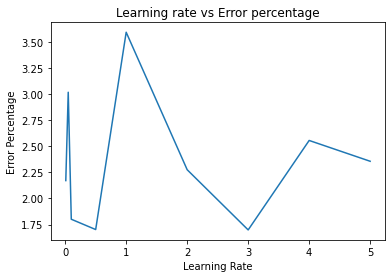

In [23]:
eta_values = [0.01, 0.05,0.1,0.5,1,2,3,4,5]
lookup = []
for eta in eta_values:
    start_time = time.time()
    accuracy, error = cross_validation(X,Y, eta=eta)
    end_time = time.time()
    lookup.append([eta, error, end_time - start_time])

lookup = np.array(lookup)
plt.plot(lookup[:,0], lookup[:,1]*100)
plt.xlabel("Learning Rate")
plt.ylabel("Error Percentage")
plt.title("Learning rate vs Error percentage")
plt.show()

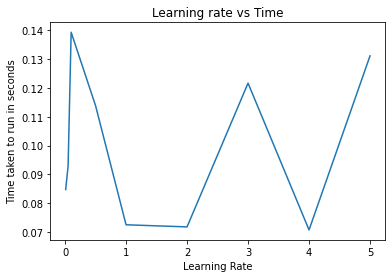

In [24]:
plt.plot(lookup[:,0],lookup[:,2])
plt.xlabel("Learning Rate")
plt.ylabel("Time taken to run in seconds")
plt.title("Learning rate vs Time")
plt.show()

- As we can see, changing eta value much doesn't significantly changes our error rate
- There is no clear pattern.
- Also there is no clear pattern with learning rate change and time too
- So we will choose eta value of 1, because this is the default value and gives good enough results

### Question 1.d) report F1 score on the held out set for best model

- So for our best model, we will take mistake threshold value as 60 and eta value as 1
- Also, we need to report F1 score. 
- Formula for F1 score is $ \frac{TP}{TP + 0.5*(FP + FN)} $
- We already have a function we implemented to get confusion matrix value
- We will utilize this function to report F1-Score 

In [25]:
mistake_threshold = 60
eta_value = 1
Y_pred = use_algorithm(X, Y, X_val,mistake_threshold, eta)
        
tp, tn, fp, fn, acc, error = get_confusion_matrix(Y_pred, Y_val)
f1score = (tp) / (tp + ((fp + fn)/2))
print("F1 Score for heldout validation set is",f1score)
print("Accuracy is",acc*100,"and error is",error*100)

F1 Score for heldout validation set is 0.9859154929577465
Accuracy is 98.63945578231292 and error is 1.3605442176870763


Note, the F1 score keeps changing on running again and again, this is because algorithm picks random values 

# Question 2
We have to consider simple demonstration of MCMC Sampling in a setting  where conjugacy is possible. <br/>
i.e Normal Likelihood with known population variance, for which the prior is another normal distribution.

### Question 2.a)
First writing a function to Calculate the Bayesian posterior probablity given n(50) new data samples drawn from a normal distribution. Prior is also a normal distribution. We will create a general function, and not a function for specific mean and sigma values

The likelihood has two parameters, the mean $\mu$ and the variance $\sigma^2$. It's given as <br/>
$$ P(x_1, x2, ...,x_n | \mu, \sigma^2) \propto \frac{1}{\sigma^n}exp(-\frac{1}{2\sigma^2} \sum(x_i-\mu)^2)$$
Keeping $\sigma^2$ fixed, the conjugate prior for $\mu$ is a Gausian given as,
$$ P(\mu | \mu_0, \sigma_0^2) \propto \frac{1}{\sigma_0^n}exp(-\frac{1}{2\sigma_0^2} \sum(\mu-\mu_0)^2)$$

Formula for Posterior for multiple measurements (n >=1), given Fixed Variance($\sigma^2$) and random mean($\mu$) is:
$$ \mu|x \sim N(\mu_1, \sigma^2_1) $$
$$ \sigma_1^2 = \bigg(\frac{1}{\sigma^2_0} + \frac{1}{\sigma^2/n}\bigg)^{-1}  $$
$$ \mu_1 = \sigma^2_1 \bigg( \frac{\mu_0}{\sigma_0^2} + \frac{\bar{x}}{\sigma^2/n}\bigg) $$



source: [Link](http://www.ams.sunysb.edu/~zhu/ams570/Bayesian_Normal.pdf)


In [26]:
def calculate_posterior(mu, sigma, mu0, sigma0, X):
    # here mu and sigma are likelihood parameters
    # mu0 and sigma0 are prior parameters
    # X is the data sample drawn from likelihood defined
    
    n_x = len(X)
    x_mean = np.mean(X)
    # n_x is size of data samples,
    # x_mean is mean of the data sample
    
    t1 = 1/(sigma0*sigma0)
    t2 = n_x/(sigma*sigma)
    sigma1 = 1/(t1+t2) # sigma1 is parameter for posterior
    
    t3 = (mu0/(sigma0*sigma0))
    t4 = (x_mean*n_x/(sigma*sigma))
    mu1 = sigma1 * (t3 + t4) # mu1 is parameter for posterior
    
    return mu1, np.sqrt(sigma1)

Now, we will draw 50 new data samples from normal distribution, with mean 10, SD 5 and store in variable X

In [27]:
X=[]
for i in range(50):
    X.append(np.random.normal(loc=10,scale=5))


Now we will proceed to plot prior, likelihood, and posterior<br/>
Prior is assumed to be mean 25 and SD 5. <br/>
Starting with plotting prior

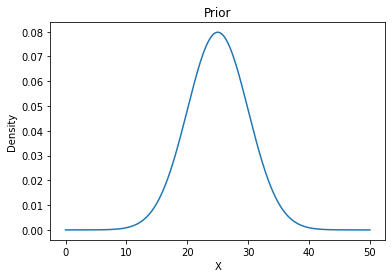

In [28]:
def normpdf(x, mu, sigma):
    u = (x-mu)/abs(sigma)
    y = (1/(np.sqrt(2*np.pi)*abs(sigma)))*np.exp(-u*u/2)
    return y

mu_prior = 25
std_prior = 5

x_graph_points = np.linspace(0,50,500) 
y_graph_points = normpdf(x_graph_points, mu_prior, std_prior)
plt.xlabel("X")
plt.ylabel("Density")
plt.title("Prior")
plt.plot(x_graph_points, y_graph_points)

Now plotting the likelihood <br/>
We have to draw 50 sample points from i.i.d normal distribution N($\mu=10, \sigma=5$) , $\sigma$ will be constant<br/>

Thus Likelihood is given as <br/>
$$P(X_1, X_2,...,X_n| \mu,\sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi \sigma^2}} exp\bigg(\frac{-1}{2\sigma^2}(x_i - \mu)\bigg)$$
$$ =\bigg(\frac{1}{\sqrt{2\pi \sigma^2}} \bigg)^n exp\bigg(\frac{-1}{2\sigma^2} \sum_{i=1}^{n}(x_i-\mu)^2\bigg) $$


$$ \sim exp\bigg(\frac{-1}{2\sigma^2} \sum_{i=1}^{n}(x_i^2-2\mu x_i + \mu^2)\bigg) $$
$$ \sim exp\bigg(\frac{-1}{2\sigma^2} (\sum_{i=1}^{n}x_i^2-2n\mu x_i + n\mu^2)\bigg) $$
$$ \sim exp\bigg(\frac{-n}{2\sigma^2} (\sum_{i=1}^{n}(x_i^2/n)-2\mu x_i + \mu^2)\bigg) $$
Suppose parameters for likelihood are $\mu_L$ and $\sigma_L$<br/>
Thus Likelihood will have form, $\sim exp\bigg(\frac{-1}{2\sigma_L^2} \sum_{i=1}^{n}(x_i-\mu_L)^2\bigg)$
Thus comparing the equations, we get $\mu_L = \bar{X}, \sigma_L^2 = \sigma^2 / n$<br/>
Lets use this to plot Likelihood now

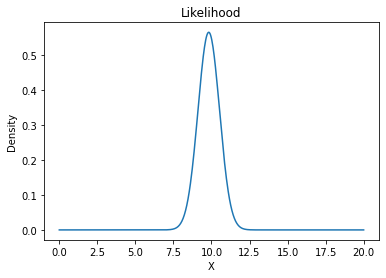

In [29]:
mu_likelihood = np.mean(X)
std_likelihood = 5/np.sqrt(len(X))
x_graph_points = np.linspace(0,20,500) 
y_graph_points = normpdf(x_graph_points, mu_likelihood, std_likelihood)
plt.xlabel("X")
plt.ylabel("Density")
plt.title("Likelihood")
plt.plot(x_graph_points, y_graph_points)
plt.show()

Now we will plot posterior. Above, we have already written function to get posterior parameters<br/>


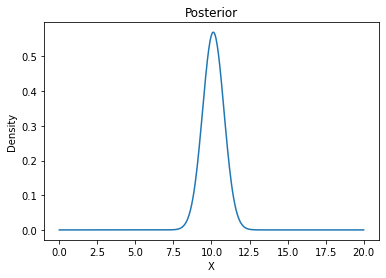

In [30]:
mu_posterior, std_posterior = calculate_posterior(mu_likelihood, 5, mu_prior, std_prior, X)
x_graph_points = np.linspace(0,20,500) 
y_graph_points = normpdf(x_graph_points, mu_posterior, std_posterior)
plt.xlabel("X")
plt.ylabel("Density")
plt.title("Posterior")
plt.plot(x_graph_points, y_graph_points)
plt.show()

Plotting all 3 together

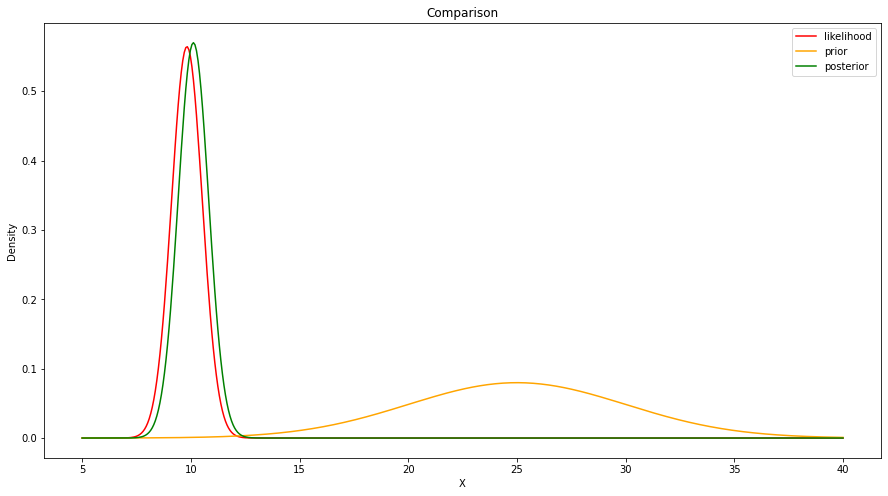

In [31]:
plt.figure(figsize=(15,8))
x_graph_points = np.linspace(5,40,500) 
y_graph_points = normpdf(x_graph_points,mu_likelihood,std_likelihood)
plt.plot(x_graph_points, y_graph_points,label='likelihood',color="r")
y_graph_points = normpdf(x_graph_points,mu_prior,std_prior)
plt.plot(x_graph_points, y_graph_points,label='prior',color="orange")
y_graph_points = normpdf(x_graph_points,mu_posterior,std_posterior)
plt.plot(x_graph_points, y_graph_points,label='posterior',color="green")
plt.xlabel("X")
plt.ylabel("Density")
plt.title("Comparison")
plt.legend()
plt.show()

### Question 2.b) Metropolis Hasting Algorithm
We have to estimate posterior distribution given the same prior and data. <br/>
Also we will plot histogram of sample and posterior side by side

In [32]:
def get_likelihood(X, mu, sigma):
    return  np.prod(normpdf(X, mu, sigma))

def get_prior(candidate, mu, sigma):
    return normpdf(candidate, mu, sigma)



Writing code for MCMC<br/>
Code is commented to explain the flow

In [33]:
def MCMC(X, N=100000, width=5, mu_prior=25,sigma_prior=5):
    sigma=width
    # This will be current theta
    sample = [10]    
    flag=False 

    for i in range(N):
        theta_curr = sample[-1]
        # drawing a value of theta, for this value, we use mean as previous theta and std
        theta_candidate = np.random.normal(theta_curr,sigma)
        
        # Get new likelihood and prior for candidate
        prior_candidate = get_prior(theta_candidate, mu_prior, sigma_prior)
        likelihood_candidate = get_likelihood(X, theta_candidate, sigma)
        
        # Calculate candidate posterior
        candidate_posterior = likelihood_candidate * prior_candidate
        
        
        prior_curr = get_prior(theta_curr, mu_prior, sigma_prior)
        likelihood_curr = get_likelihood(X, theta_curr, sigma)
        posterior_curr = prior_curr * likelihood_curr
        
        # get ratio, if ratio is greater than 1, it is always accepted
        # is it is accepted probablistically
        ratio = candidate_posterior / posterior_curr
        
        if np.random.random() < ratio:
            sample.append(theta_candidate)
            
        else:
            sample.append(theta_curr)
            
        
        
        # One time burn in
        if len(sample) == 2500 and flag == False:
            sample = sample[2000:]
            flag = True
        

    return sample 

Running the code, and side by side plotting actual posterior<br/>
Here we will use width(SD) of 5. 

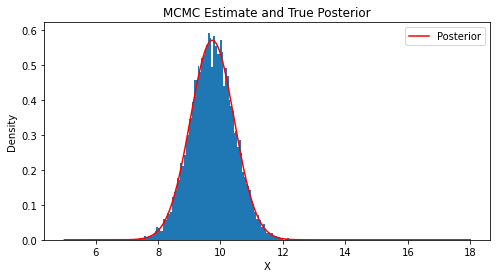

In [34]:
sig = 5
mean = 10
width = 5

X=[]
for i in range(50):
    X.append(np.random.normal(loc=mean,scale=sig))
X = np.array(X)
mu_likelihood = np.mean(X)
mu_posterior, std_posterior = calculate_posterior(mu_likelihood,sig, mu_prior, std_prior, X)
#print(mu_posterior, std_posterior)
sample = MCMC(X,width=width)

x_graph_points = np.linspace(5,18,500) 
plt.figure(figsize=(8,4))
plt.hist(sample, bins=100, density=True)
plt.plot(x_graph_points, normpdf(x_graph_points,mu_posterior,std_posterior),label='Posterior',color='r')
plt.legend()
plt.title('MCMC Estimate and True Posterior')
plt.xlabel("X")
plt.ylabel("Density")
plt.show()


As we can see, MCMC algo is able to give us estimate distribution for posterior

### Question 2.c)
First we need to check effect of width on speed of convergence <br/>
For this we will add an convergence condition in our code <br/>
We will be storing all candidates we get in "sample" named list. <br/>
Every 10000 iteration, we will convert our sample list to histogram<br/>
If mode of our histogram doesn't shifts for 2 consecutive iterations, then we will conclude our MCMC algo converged<br/>


In [35]:
def MCMC_converge(X, N=100000, width=5, mu_prior=25,sigma_prior=5):
    sigma=width
    sample = [30]
    
    flag=False 
    prev_mode = 0 # this will be used to keep track of convergence
    
    posterior_curr = get_prior(sample[-1], mu_prior, sigma_prior) * get_likelihood(X, sample[-1], sigma)
    
    for i in range(N):
        theta_curr = sample[-1]
        
        # drawing a value of theta, for this value, we use mean as previous theta and std
        theta_candidate = np.random.normal(theta_curr, sigma)
        
        # Get new likelihood and prior for candidate
        prior_candidate = get_prior(theta_candidate, mu_prior, sigma_prior)
        likelihood_candidate = get_likelihood(X, theta_candidate, sigma)
    
        # Calculate posterior candidate
        candidate_posterior = prior_candidate * likelihood_candidate
        
        prior_curr = get_prior(theta_curr, mu_prior, sigma_prior)
        likelihood_curr = get_likelihood(X, theta_curr, sigma)
        posterior_curr = prior_curr * likelihood_curr
        
        # get ratio, if ratio is greater than 1, it is always accepted
        # is it is accepted probablistically
        ratio = candidate_posterior / posterior_curr
        
        if np.random.random() < ratio:
            sample.append(theta_candidate)
            posterior_curr = candidate_posterior
        else:
            sample.append(sample[-1])
            
        
        
        # One time burn in
        if len(sample) == 2500 and flag == False:
            sample = sample[2000:]
            flag = True
        
        # Condition to check for convergence
        if len(sample) % 10000 == 0 and flag==True:
            histogram,_ = np.histogram(sample,bins=10000,range=(0,50))
            curr_mode = histogram.argmax()
            # if mode of histogram doesnt shift, return
            if curr_mode == prev_mode:
                return i, sample
            prev_mode = curr_mode
    return i, sample 

Code converged at iteration 31998


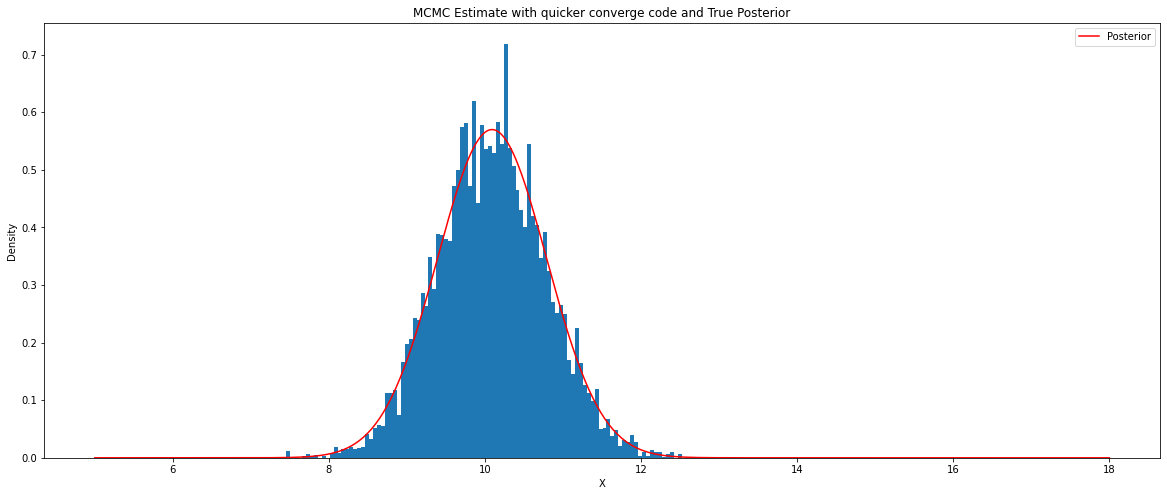

In [36]:
sig = 5
mean = 10
width = 5
X=[]
for i in range(50):
    X.append(np.random.normal(loc=mean,scale=sig))
X = np.array(X)
mu_likelihood = np.mean(X)
mu_posterior, std_posterior = calculate_posterior(mu_likelihood,sig, mu_prior, std_prior, X)
#print(mu_posterior, std_posterior)
i, sample = MCMC_converge(X,width=width)
print("Code converged at iteration",i)

x_graph_points = np.linspace(5,18,500) 
plt.figure(figsize=(20,8))
plt.hist(sample, bins=100, density=True)
plt.plot(x_graph_points, normpdf(x_graph_points,mu_posterior,std_posterior),label='Posterior',color='r')
plt.legend()
plt.title('MCMC Estimate with quicker converge code and True Posterior')
plt.xlabel("X")
plt.ylabel("Density")

plt.show()


Now we will check how does speed of convergence vary with width. We will try for few values of width and plot it as number of iterations taken to convege

C:\Users\manjy\AppData\Local\Temp/ipykernel_10516/951521058.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ratio = candidate_posterior / posterior_curr
C:\Users\manjy\AppData\Local\Temp/ipykernel_10516/951521058.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = candidate_posterior / posterior_curr


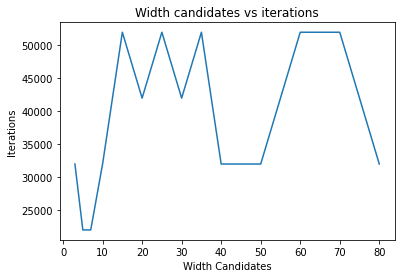

In [37]:
candidate_widths = [3,5,7,10,15,20,25,30,35,40,50,60,70,80]
lookup=[]
# Generating X
sig = 5
mean = 10
X= []
for i in range(50):
    X.append(np.random.normal(loc=mean,scale=sig))
X = np.array(X)


for width in candidate_widths:
    i, _ = MCMC_converge(X,width=width)
    lookup.append([width, i])
    
lookup = np.array(lookup)
plt.plot(lookup[:,0], lookup[:,1])
plt.xlabel("Width Candidates")
plt.ylabel("Iterations")
plt.title("Width candidates vs iterations")
plt.show()

With the method of convergence I used, there is no clear impact of width on time. Almost everytime we are getting iterations less than 20000. And there is no clear pattern<br/> But we will soon notice that higher widths arent giving an optimal solution

Now we will find for the optimal width value. <br/>
For this we will try to plot analytical posteriors and different sample of widths

C:\Users\manjy\AppData\Local\Temp/ipykernel_10516/951521058.py:29: RuntimeWarning: invalid value encountered in double_scalars
  ratio = candidate_posterior / posterior_curr
C:\Users\manjy\AppData\Local\Temp/ipykernel_10516/951521058.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = candidate_posterior / posterior_curr


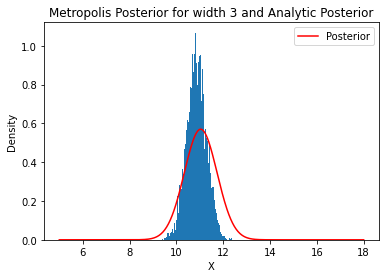

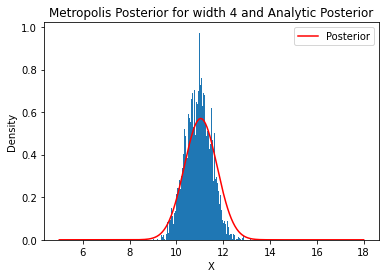

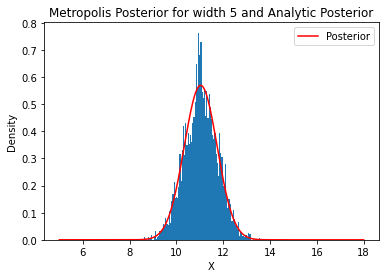

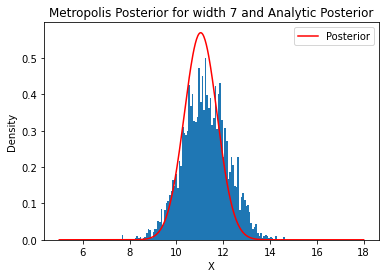

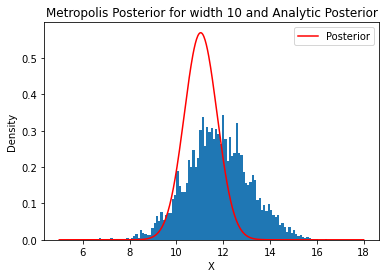

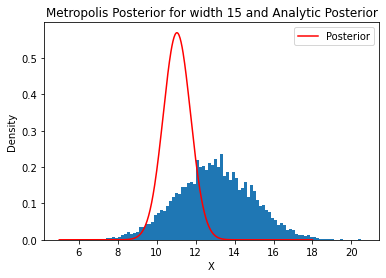

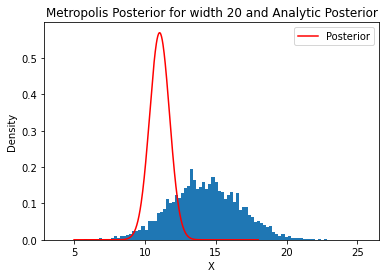

In [38]:
candidate_widths = [3,4,5,7,10,15,20]

sig = 5
mean = 10
X=[]
for i in range(50):
    X.append(np.random.normal(loc=mean,scale=sig))
X = np.array(X)
mu_likelihood = np.mean(X)
mu_posterior, std_posterior = calculate_posterior(mu_likelihood,sig, mu_prior, std_prior, X)
for width in candidate_widths:
    
    i, sample = MCMC_converge(X,width=width)
    x_graph_points = np.linspace(5,18,500) 
    plt.figure(figsize=(6,4))
    plt.hist(sample, bins=100, density=True)
    plt.plot(x_graph_points, normpdf(x_graph_points,mu_posterior,std_posterior),label='Posterior',color='r')
    plt.legend()
    plt.title(f'Metropolis Posterior for width {width} and Analytic Posterior')
    plt.xlabel("X")
    plt.ylabel("Density")
    plt.show()


As we can see here, width values between 4-6 are giving more optimal solutions, where 5 is fitting best. So we will consider 5 to be our optimal width and other values like 4,6 to be sub optimal <br/>
Now Lets demonstrate consequences of stopping early with suboptimal value, we will use value of width as 4, and run the code for just 5000 iterations

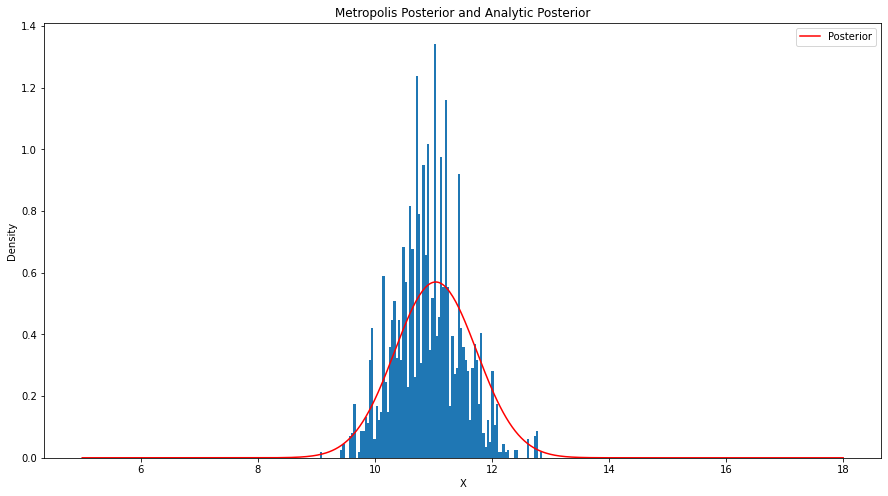

In [39]:
width =4
i, sample = MCMC_converge(X,N=5000,width=width)
x_graph_points = np.linspace(5,18,500) 
plt.figure(figsize=(15,8))
plt.hist(sample, bins=100, density=True)
plt.plot(x_graph_points, normpdf(x_graph_points,mu_posterior,std_posterior),label='Posterior',color='r')
plt.legend()
plt.title('Metropolis Posterior and Analytic Posterior')
plt.xlabel("X")
plt.ylabel("Density")

plt.show()


Thus we can observe, that using suboptimal values for width and stopping very early, it doesn't give a good distribution, the graph hasn't converged and will certainly need many more iterations